In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [8]:
ferrara1 = pd.read_csv('./ferrara_150715.csv')
ferrara2 = pd.read_csv('./ferrara_250715.csv')
ferrara3 = pd.read_csv('./ferrara_270615.csv')
ferrara=pd.concat([ferrara1,ferrara1,ferrara1],ignore_index=True)

torino1 = pd.read_csv('./torino_150715.csv')
torino2 = pd.read_csv('./torino_250715.csv')
torino3 = pd.read_csv('./torino_270615.csv')
torino = pd.concat([torino1,torino2,torino3],ignore_index=True) 

mantova1 = pd.read_csv('./mantova_150715.csv')
mantova2 = pd.read_csv('./mantova_250715.csv')
mantova3 = pd.read_csv('./mantova_270615.csv')
mantova = pd.concat([mantova1,mantova2,mantova3],ignore_index=True) 

milano1 = pd.read_csv('./milano_150715.csv')
milano2 = pd.read_csv('./milano_250715.csv')
milano3 = pd.read_csv('./milano_270615.csv')
milano = pd.concat([milano1,milano2,milano3],ignore_index=True) 

ravenna1 = pd.read_csv('./ravenna_150715.csv')
ravenna2 = pd.read_csv('./ravenna_250715.csv')
ravenna3 = pd.read_csv('./ravenna_270615.csv')
ravenna = pd.concat([ravenna1,ravenna2,ravenna3],ignore_index=True)

asti1 = pd.read_csv('./asti_150715.csv')
asti2 = pd.read_csv('./asti_250715.csv')
asti3 = pd.read_csv('./asti_270615.csv')
asti = pd.concat([asti1,asti2,asti3],ignore_index=True)

bologna1 = pd.read_csv('./bologna_150715.csv')
bologna2 = pd.read_csv('./bologna_250715.csv')
bologna3 = pd.read_csv('./bologna_270615.csv')
bologna = pd.concat([bologna1,bologna2,bologna3],ignore_index=True)

piacenza1 = pd.read_csv('./piacenza_150715.csv')
piacenza2 = pd.read_csv('./piacenza_250715.csv')
piacenza3 = pd.read_csv('./piacenza_270615.csv')
piacenza = pd.concat([piacenza1,piacenza2,piacenza3],ignore_index=True)

cesena1 = pd.read_csv('./cesena_150715.csv')
cesena2 = pd.read_csv('./cesena_250715.csv')
cesena3 = pd.read_csv('./cesena_270615.csv')
cesena = pd.concat([cesena1,cesena2,cesena3],ignore_index=True)

faenza1 = pd.read_csv('./faenza_150715.csv')
faenza2 = pd.read_csv('./faenza_250715.csv')
faenza3 = pd.read_csv('./faenza_270615.csv')
faenza = pd.concat([faenza1,faenza2,faenza3],ignore_index=True)
# 删除无用的列
cities = [faenza,cesena, piacenza,bologna, asti, ravenna, milano, mantova, torino, ferrara]
for city in cities:
    city.drop(labels='Unnamed: 0', axis=1, inplace=True)
faenza.head(2)

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,29.40,83,1015,moderate rain,1436863177,3.62,94.001,Faenza,2015-07-14 10:39:37,37
1,30.12,78,1015,moderate rain,1436866759,3.10,80.000,Faenza,2015-07-14 11:39:19,37


In [21]:
# 显示最高温度于离海远近的关系（观察多个城市）
max_temp = []
distance = []
for city in cities:
    max_temp.append(city['temp'].max())
    distance.append(city['dist'][0])
max_temp

[32.74000000000001,
 32.81,
 33.920000000000016,
 33.850000000000016,
 34.31,
 32.79000000000002,
 34.81,
 34.18000000000001,
 34.69,
 32.75]

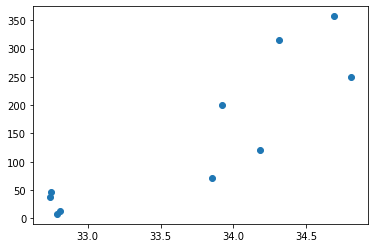

In [57]:
plt.scatter(max_temp,distance)
plt.xlabel = 'temperature'
plt.ylabel = 'distance'
plt.label = 'temp-dist'

In [51]:
# 样本数据提取
feature = np.array(distance)
target = np.array(max_temp)

In [52]:
# 导入sklearn模块, 实例化类
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [62]:
# 训练模型
linear.fit(feature.reshape(-1,1) ,target)
# 基于训练好的模型对象实现预测功能（获取方程的解）
linear.predict([[266],[333]])

array([34.38867418, 34.76888523])

In [65]:
x = np.linspace(0,400,num=100)
y = linear.predict(x.reshape(-1,1))

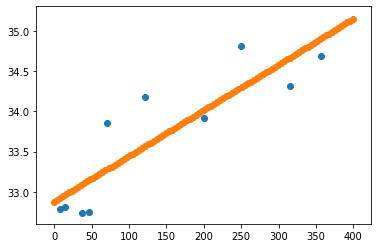

In [76]:
plt.scatter(distance, max_temp)
plt.scatter(x, y)